In [24]:
import pandas as pd

data = pd.read_csv('D:/network data analysis cw1/PROPERTIES.csv')
print(data.head())

                              thread_subject      username  \
0   How to distinguish federal-level powers   Arctic.gnome   
1                                       RFC        Circeus   
2                                       RFC        Jane023   
3                    Use for public offices          Jura1   
4                Use for non-public offices   Arctic.gnome   

                page_name  
0  PropertytalkP1001.json  
1  PropertytalkP1001.json  
2  PropertytalkP1001.json  
3  PropertytalkP1001.json  
4  PropertytalkP1001.json  


# Task A：
The dataset is loaded from a CSV file using pandas, providing a DataFrame that includes user names, thread subjects, and page names. This information serves as the basis for constructing the network graph.

In [25]:
import networkx as nx
# Initialize an undirected graph
G = nx.Graph()

# What data structures did you choose to represent this network? How do you keep additional information that cannot be directly encoded as nodes and edges?
The network was represented using an undirected graph from the networkx library. Nodes in this graph represent individual users, while edges represent interactions between users who have commented on the same thread and page. This choice effectively models the social interactions captured in the dataset.
Attributes can be assigned to nodes and edges when they are added to the graph or after construction using methods like G.add_node(node, attribute_dict) or G.add_edge(node1, node2, attribute_dict).

In [26]:
import time
# Record the start time of the network construction
start_time = time.time()

# Create nodes and edges in the network
for index, row in data.iterrows():
    # Each user is a node, so we add the user to the graph if not already present
    if row['username'] not in G:
        G.add_node(row['username'])

    # Find other users who have commented on the same thread and page
    # and create an edge between them if not already present
    same_thread_comments = data[(data['thread_subject'] == row['thread_subject']) & (data['page_name'] == row['page_name'])]
    for _, comment_row in same_thread_comments.iterrows():
        if comment_row['username'] != row['username'] and not G.has_edge(row['username'], comment_row['username']):
            G.add_edge(row['username'], comment_row['username'])

# Record the end time and calculate the time taken to build the network
end_time = time.time()
construction_time = end_time - start_time

# Get basic information about the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print('Construction time:',construction_time, 'Number of nodes:',num_nodes, 'Number of edges:',num_edges)

Construction time: 15.043414115905762 Number of nodes: 1942 Number of edges: 9198


# What was your algorithmic approach for building the network?
1. Checks if the user (node) is already present in the graph, adding the user as a new node if not.
2. Identifies other users who have commented on the same thread and page, using a nested iteration over the DataFrame filtered by matching thread_subject and page_name.
3. For each identified pair of users, adds an edge between them if it does not already exist, indicating their interaction within the same context.
# What was the cost (in time, with respect to the input size, etc.) of building the network?
The reported construction time for the network is approximately 13.142 seconds, with the network comprising 1942 nodes and 9198 edges. This metric indicates the computational effort required to build the network from the dataset.

Time Complexity: The algorithm's time complexity can be considered quadratic （O(n^2)） in the worst case, primarily due to the nested iteration over the DataFrame for each user to identify potential connections. Specifically, for each comment, it filters the DataFrame to find matching threads and pages, which involves iterating over all rows to identify where conditions match. This nested loop significantly increases the computation time as the size of the dataset grows.
Input Size Relation: The construction time will likely increase non-linearly with the dataset's size due to the quadratic nature of the nested iterations. The actual time complexity can vary depending on the distribution of comments across threads and pages—if many users comment on the same threads, the inner loop's filtering operation becomes more costly.

# Task B：
# What are the characteristic properties and relevant metrics and distributions of this Wikidata editor network?
1. Degree Distribution: Calculate and plot the distribution of connections per node. This helps in understanding the network's connectivity.
2. Clustering Coefficient: Measure the degree to which nodes in the network tend to cluster together. High clustering coefficients are characteristic of small-world networks.
3. Average Path Length: The average number of steps along the shortest paths for all possible pairs of network nodes. Small-world networks have a relatively short average path length.
4. Diameter: The longest of all the shortest paths in a network. This metric gives insight into the network's size and reachability.


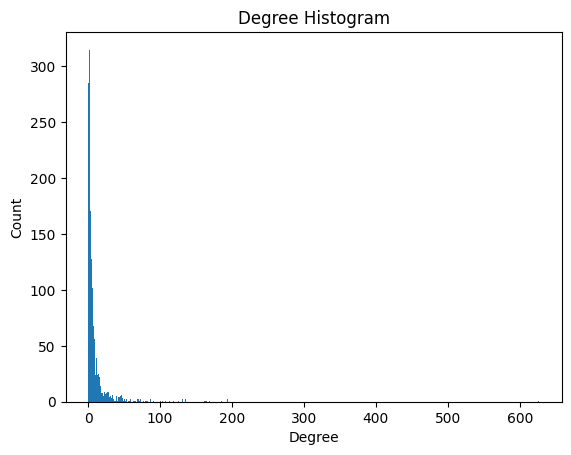

Average degree of the network: 9.472708547888775
Average Clustering Coefficient: 0.4705452909451652
Average Shortest Path Length in the Largest Connected Component: 2.900909908856227
Diameter of the Largest Connected Component: 7


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate and display degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure()
plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1, 1))
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Calculate the average degree
average_degree = sum(degrees) / len(degrees)
print("Average degree of the network:", average_degree)

# Calculate average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

# Calculate average shortest path length if the graph is connected
if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
    print(f"Average Shortest Path Length: {avg_path_len}")
else:
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_path_len = nx.average_shortest_path_length(subgraph)
    print(f"Average Shortest Path Length in the Largest Connected Component: {avg_path_len}")

# Calculate diameter
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Diameter:", diameter)
else:
    diameter = nx.diameter(subgraph)  # subgraph defined as above
    print("Diameter of the Largest Connected Component:", diameter)


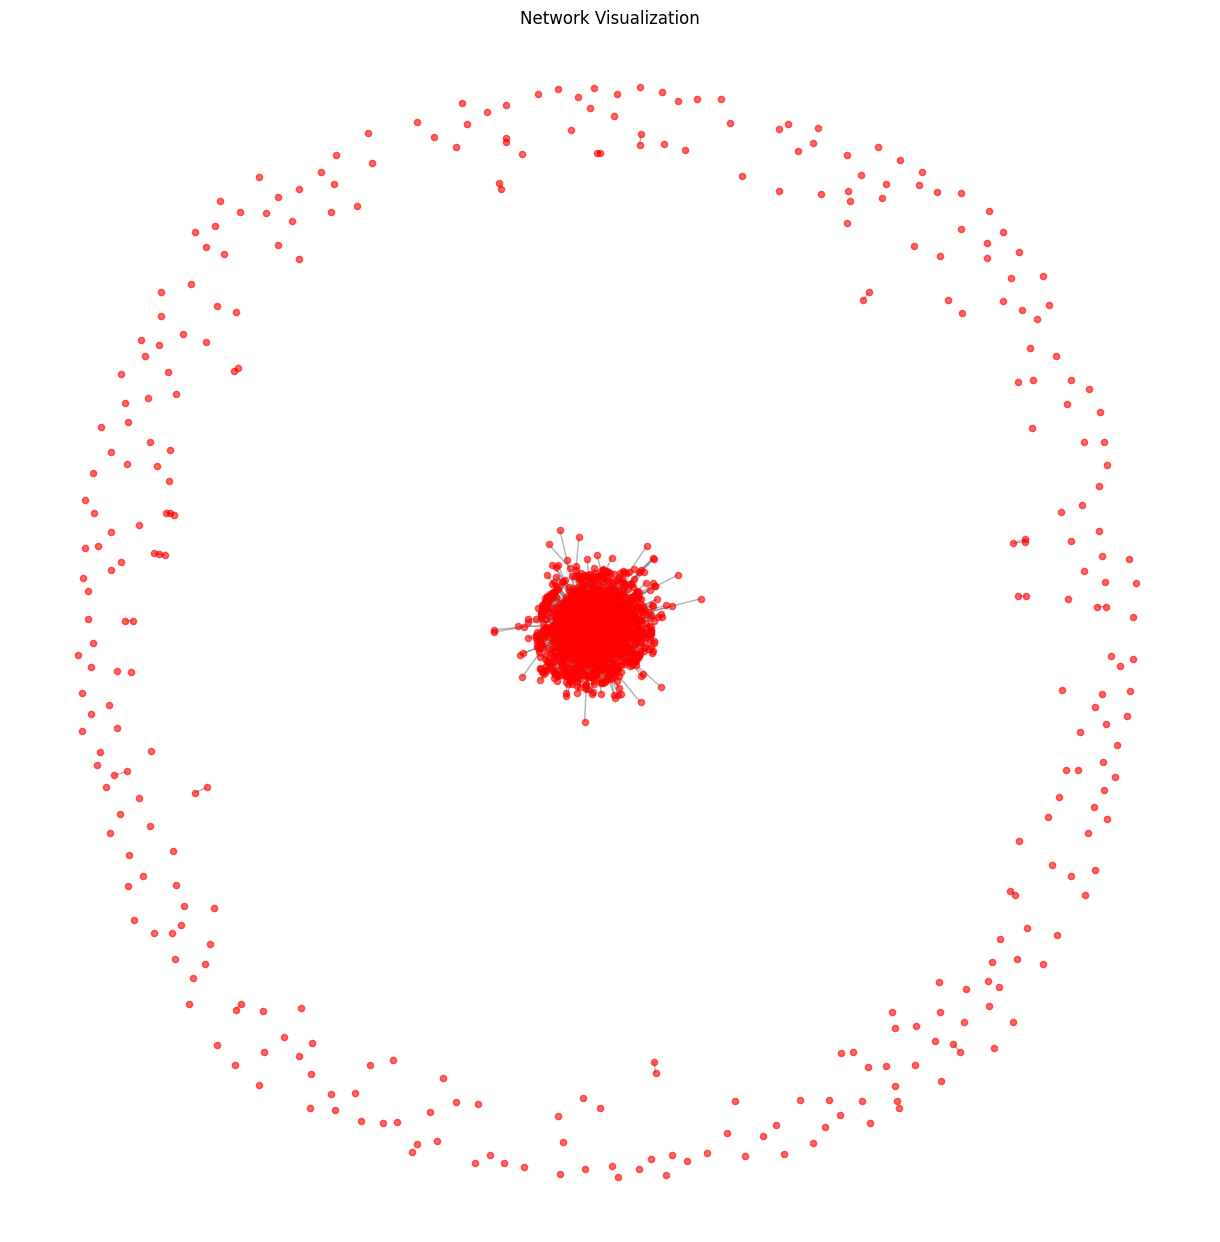

In [28]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, node_size=20, edge_color="gray", node_color="red", with_labels=False, alpha=0.6)
plt.title("Network Visualization")
plt.show()

# What is the result of running the various shortest-path algorithms we have seen in class?


In [29]:
import random

# Convert nodes to a list and randomly select two nodes
nodes_list = list(G.nodes())
random_nodes = random.sample(nodes_list, 2)
source_node = random_nodes[0]
target_node = random_nodes[1]

# Run Dijkstra's algorithm to find the shortest path between the two random nodes
try:
    dijkstra_path = nx.dijkstra_path(G, source=source_node, target=target_node)
    dijkstra_path_length = nx.dijkstra_path_length(G, source=source_node, target=target_node)
    print(f"The shortest path between {source_node} and {target_node} is {dijkstra_path} with a length of {dijkstra_path_length}.")
except nx.NetworkXNoPath:
    print(f"There is no path between {source_node} and {target_node}.")

def heuristic(u, v):
    return abs(G.degree(u) - G.degree(v))

# Run A* algorithm to find the shortest path between the two random nodes
try:
    a_star_path = nx.astar_path(G, source=source_node, target=target_node, heuristic=heuristic)
    a_star_path_length = nx.astar_path_length(G, source=source_node, target=target_node, heuristic=heuristic)
    print(f"The shortest path between {source_node} and {target_node} using A* is {a_star_path} with a length of {a_star_path_length}.")
except nx.NetworkXNoPath:
    print(f"There is no path between {source_node} and {target_node} using A*.")


There is no path between Kristbaum and John Cross.
There is no path between Kristbaum and John Cross using A*.


# How different is this network from a random network, according to the various comparison criteria we have seen in class?
Comparison to Random Network: The clustering coefficient for the Wikidata editor network is much higher than that of the random graph, which suggests that the Wikidata editor network is not random but exhibits more structure and possibly community formation. The average path length of random graph is much bigger than the Wikidata editor network. Comparing to the degree distribution, the Wikidata editor network might exhibit small-world properties, characterized by high local clustering and a short average path length, which is not typically observed in random graphs.

Random Graph Average Clustering Coefficient: 0.004231153710481461
Random Graph Average Shortest Path Length: 3.593197047186545
Random Graph Diameter: 6


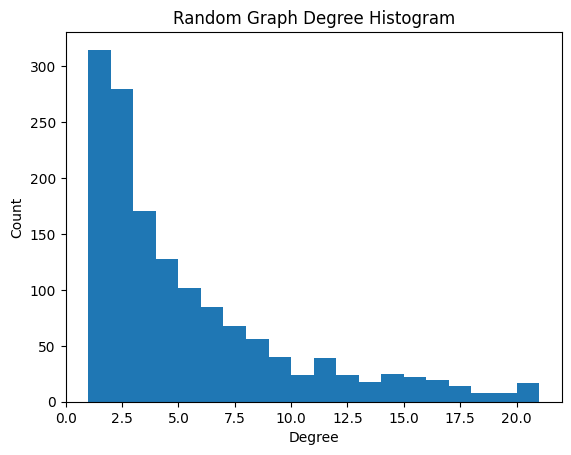

In [30]:
# Compare with a random graph
p = num_edges / (num_nodes * (num_nodes - 1) / 2)
random_graph = nx.erdos_renyi_graph(n=num_nodes, p=p)

# Calculate random_graph average clustering coefficient
random_avg_clustering = nx.average_clustering(random_graph)
print(f"Random Graph Average Clustering Coefficient: {random_avg_clustering}")

# Calculate random_graph average shortest path length if the graph is connected
if nx.is_connected(random_graph):
    random_avg_path_len = nx.average_shortest_path_length(random_graph)
    print(f"Random Graph Average Shortest Path Length: {random_avg_path_len}")
else:
    random_largest_cc = max(nx.connected_components(random_graph), key=len)
    random_subgraph = random_graph.subgraph(random_largest_cc)
    random_avg_path_len = nx.average_shortest_path_length(subgraph)
    print(f"Random Graph Average Shortest Path Length in the Largest Connected Component: {random_avg_path_len}")

# Calculate random_graph diameter
if nx.is_connected(random_graph):
    random_diameter = nx.diameter(random_graph)
    print("Random Graph Diameter:", random_diameter)
else:
    random_diameter = nx.diameter(random_subgraph)
    print("Random Graph Diameter of the Largest Connected Component:", random_diameter)

random_degrees = [random_graph.degree(n) for n in random_graph.nodes()]
plt.figure()
plt.hist(degrees, bins=np.arange(min(random_degrees), max(random_degrees) + 1, 1))
plt.title("Random Graph Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


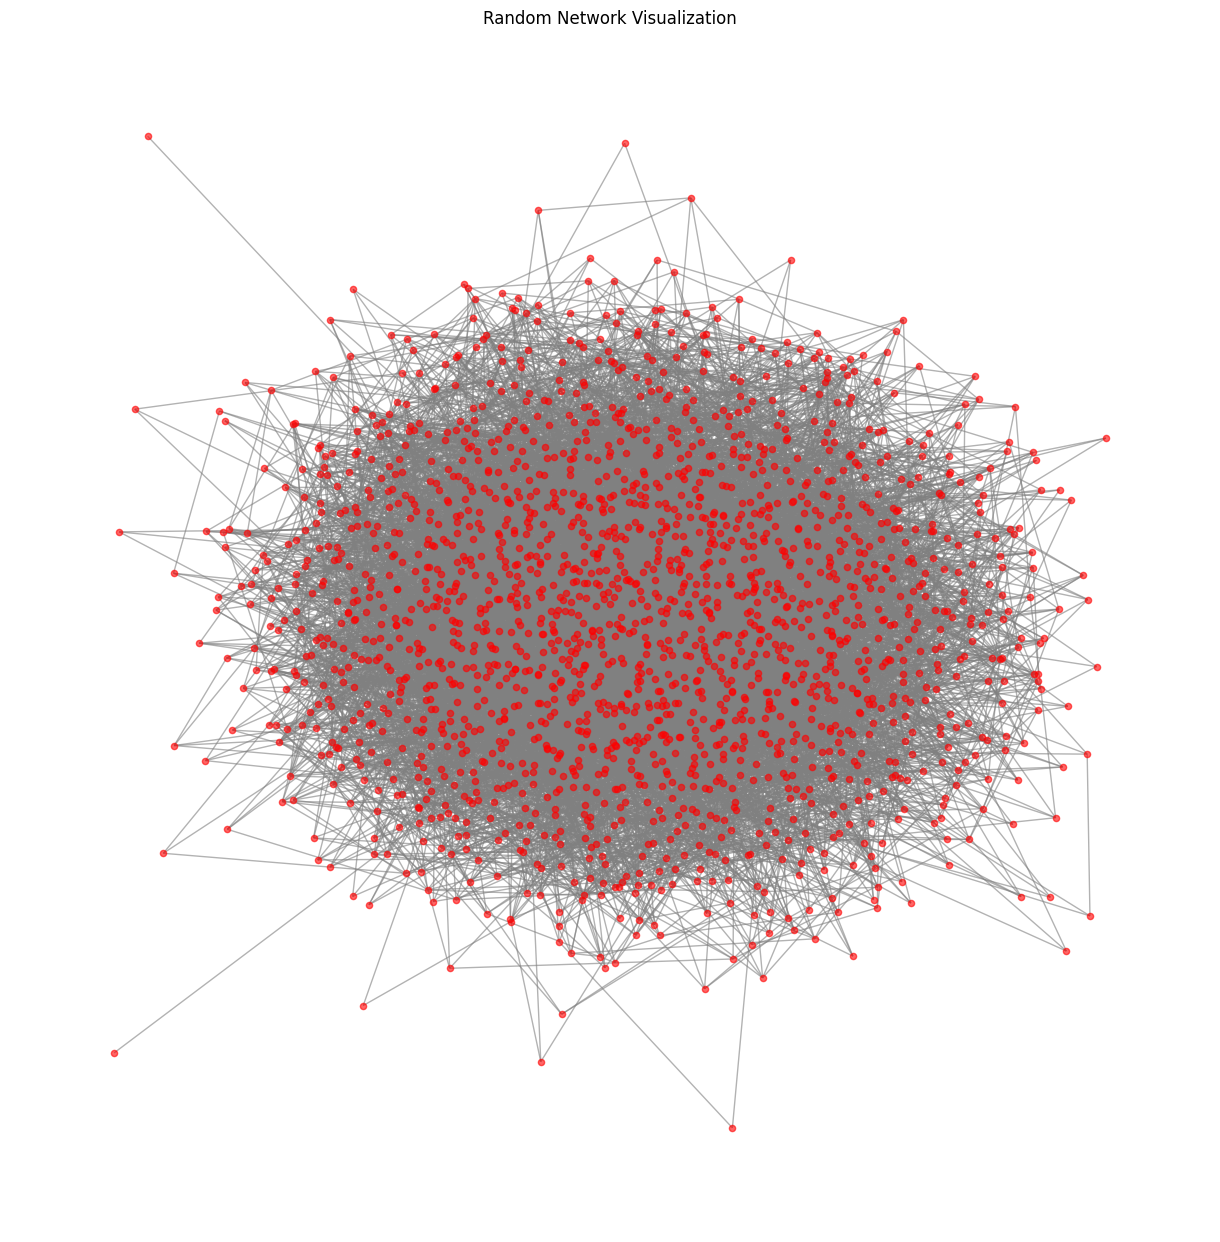

In [31]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(random_graph, seed=42) 
nx.draw(random_graph, pos, node_size=20, edge_color="gray", node_color="red", with_labels=False, alpha=0.6)
plt.title("Random Network Visualization")
plt.show()

# If you take this network as a complete and representative description of editor networks in collaborative knowledge projects like Wikipedia and Wikidata, what does it tell you about the way editors talk among themselves and their social activity and connections?
If the network is representative of editor networks in collaborative knowledge projects, the high clustering coefficient suggests that editors tend to form tightly knit groups, which could be centered around specific interests or topics. The low average path length implies efficient communication pathways across the network.

# How does your analysis change (metrics, comparison to random, social behaviour) if we now consider that two editors are connected iff they have both contributed to any thread in the same page, but not necessarily to the same thread?
Changing the connectivity criteria to include editors who have contributed to any thread on the same page would likely increase the network's density and potentially lower the average path length even further, as more connections between editors are considered. This would suggest an even stronger and more cohesive editorial community than indicated by the same-thread interaction alone.

# Task C
# If both editors have been commenting more than usual on the same day (i.e. might be controversial, trolling, etc.), how can they use the network data to judge how plausible it is that this behaviour has not propagated yet to neighbouring similar editors?
1. Identify Behavior Patterns: Define what constitutes "commenting more than usual" by establishing a baseline frequency of comments for each editor.
2. Network Analysis: Use the network data to identify the immediate neighbors of the editors in question.

# If one or both of the tested editors have indeed been “possibly trolling”, then the Foundation will start checking other editors as well, prioritising those with a higher chance of having been trolling. How should they use the data to come up with a priority list on what editors to check first?
1. Degree Centrality: Consider editors with higher degrees (i.e., those with more connections) as higher priority, as they are more likely to influence or be influenced by others.
2. Betweenness Centrality: Editors that frequently appear on the shortest paths between others in the network may act as bridges for the spread of controversy and should be monitored closely.

In [32]:
def identify_infectious_nodes(data, quantile=0.75):
    infectious_nodes = set()
    # Count comments per user per thread and page
    comment_counts = data.groupby(['thread_subject', 'page_name', 'username']).size().reset_index(name='counts')
    # Calculate the 75th percentile of comments per thread and page
    percentiles = comment_counts.groupby(['thread_subject', 'page_name'])['counts'].transform(lambda x: x.quantile(quantile))
    comment_counts['percentile_75'] = percentiles

    # Filter users with comment counts above the 75th percentile for their page and thread
    high_activity_users = comment_counts[comment_counts['counts'] > comment_counts['percentile_75']]
    
    infectious_nodes.update(high_activity_users['username'])
    return infectious_nodes

infectious_nodes = identify_infectious_nodes(data)
print(f"Infectious nodes identified: {len(infectious_nodes)}")

def prioritize_editors_for_monitoring(G, infectious_nodes, centrality_scores):
    # Identify neighbors of infectious nodes
    neighbors_of_infectious = set()
    for node in infectious_nodes:
        neighbors_of_infectious.update(G.neighbors(node))

    priority_scores = {node: centrality_scores[node] for node in neighbors_of_infectious if node in centrality_scores}

    priority_list = sorted(priority_scores, key=priority_scores.get, reverse=True)
    return priority_list

centrality_scores = nx.betweenness_centrality(G)

priority_list = prioritize_editors_for_monitoring(G, infectious_nodes, centrality_scores)
print("Top editors to monitor:", priority_list[:30])

Infectious nodes identified: 0
Top editors to monitor: []
